# COVID-19 Data analysis for France, french data source

Data extracted from french repository https://github.com/opencovid19-fr/data, which comes from the french goverment and display the daily evolution for region and department. Check https://veille-coronavirus.fr/ for a dashboard with a data balance.
Extra info from data set at https://www.data.gouv.fr/en/datasets/chiffres-cles-concernant-lepidemie-de-covid19-en-france/#_

Data is read from github repository and exploited according to each analysis

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import re
# import local functions
import covid19_analysis.dataFun as df

In [174]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
# Define path from online repo
repo_url='https://raw.githubusercontent.com/opencovid19-fr/data/master/'
cases_path = 'dist/chiffres-cles.csv'

# Get data from online repo
mydateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df_c_raw=pd.read_csv(repo_url+cases_path, parse_dates=['date'])

In [194]:
df_c_raw.head(10)
df_c_raw['maille_code'].unique()
dep_store = [];
u_col = df_c_raw['maille_code'].unique()
for dep in u_col:
    if re.search('DEP', dep):
        dep_store.append(dep)

In [195]:
df_c_raw.head(10)

,date,granularite,maille_code,maille_nom,cas_confirmes,deces,reanimation,source_nom,source_url
0,2020-01-24,departement,DEP-16,Charente,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
1,2020-01-24,departement,DEP-17,Charente-Maritime,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
2,2020-01-24,departement,DEP-19,Corrèze,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
3,2020-01-24,departement,DEP-23,Creuse,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
4,2020-01-24,departement,DEP-24,Dordogne,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
5,2020-01-24,departement,DEP-33,Gironde,1.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
6,2020-01-24,departement,DEP-40,Landes,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
7,2020-01-24,departement,DEP-47,Lot-et-Garonne,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
8,2020-01-24,departement,DEP-64,Pyrénées-Atlantiques,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...
9,2020-01-24,departement,DEP-79,Deux-Sèvres,0.0,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...


## Whole country status

In [178]:
date_time = df_c_raw.date.unique()
print(df_c_raw.granularite.unique())
# Get data for country only (exclude world, department, and others)
df_fr = df_c_raw.loc[df_c_raw.granularite == 'pays']

['departement' 'region' 'collectivite-outremer' 'pays' 'monde']


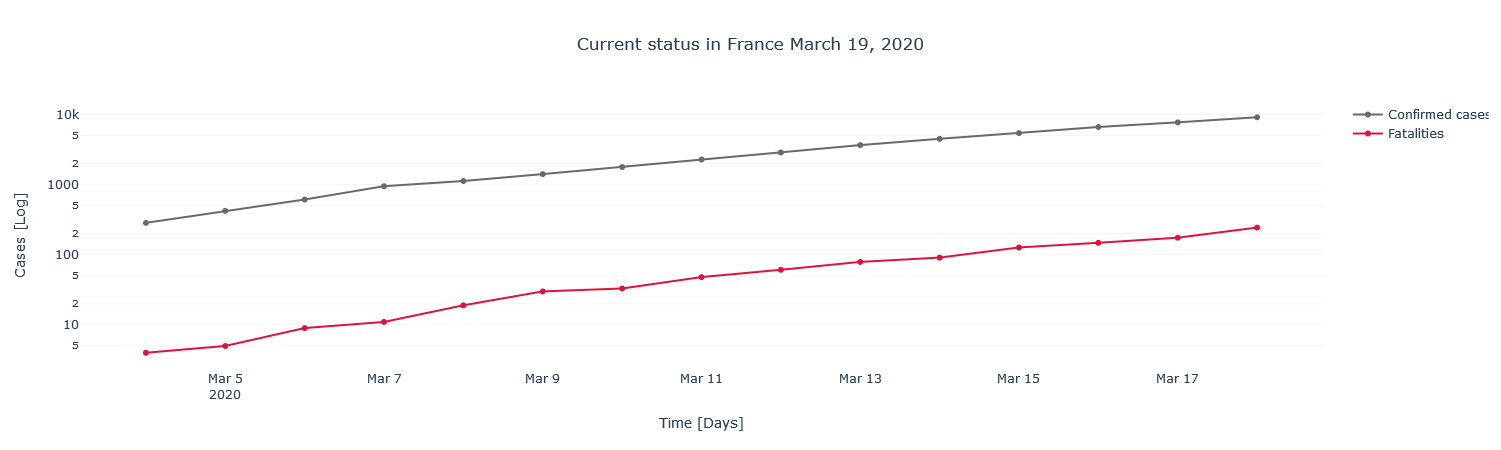

In [180]:
# Build plot for basic data display
fig = go.Figure()
# Confirmed cases
fig.add_trace(
    go.Scatter(
        mode = 'lines+markers',
        x=df_fr.date, 
        y=np.array(df_fr.cas_confirmes, dtype=int),  
        name = 'Confirmed cases',
        marker=dict(color='DimGray'),
))
# Fatalities
fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        x=df_fr.date, 
        y=np.array(df_fr.deces, dtype=int), 
        name = 'Fatalities',
        marker=dict(color='crimson')
))

fig.update_layout(yaxis_title = 'Cases [Log]', yaxis_type="log")

fig.update_layout(
    xaxis_title = 'Time [Days]',
    plot_bgcolor='white',  
    title = 'Current status in France ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

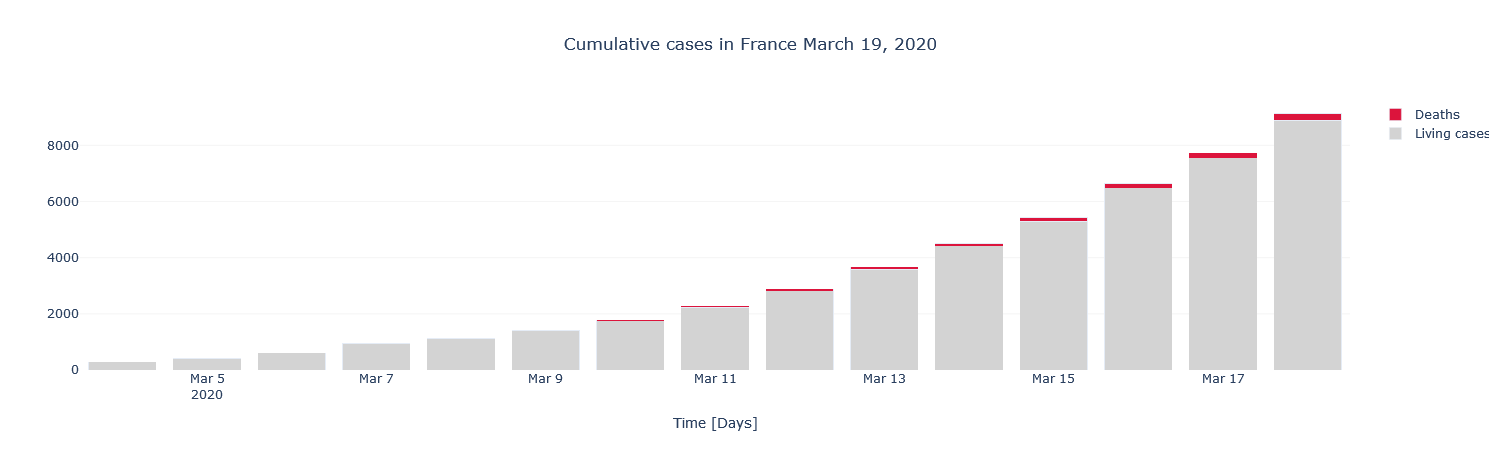

In [181]:
# Build plot for basic data display
fig = go.Figure()
# Confirmed cases
fig.add_trace(
    go.Bar(
        x=df_fr.date, 
        y=np.array(df_fr.cas_confirmes, dtype=int) - np.array(df_fr.deces, dtype=int),  
        name = 'Living cases',
        marker=dict(color='LightGrey')
))
# Fatalities
fig.add_trace(
    go.Bar(
        x=df_fr.date, 
        y=np.array(df_fr.deces, dtype=int), 
        name = 'Deaths',
        marker=dict(color='crimson')
))

fig.update_layout(
    barmode = 'stack',
    xaxis_title = 'Time [Days]',
    plot_bgcolor='white',  
    title = 'Cumulative cases in France ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

In [182]:
# Calculate daily arrays
data_tmp = np.array(df_fr.cas_confirmes, dtype=int)
cases_d = data_tmp[1:]-data_tmp[:data_tmp.size-1]
cases_d = np.insert(cases_d, 0, data_tmp[0])

# Daily death
data_tmp = np.array(df_fr.deces, dtype=int)
death_d = data_tmp[1:]-data_tmp[:data_tmp.size-1]
death_d = np.insert(death_d, 0, data_tmp[0])

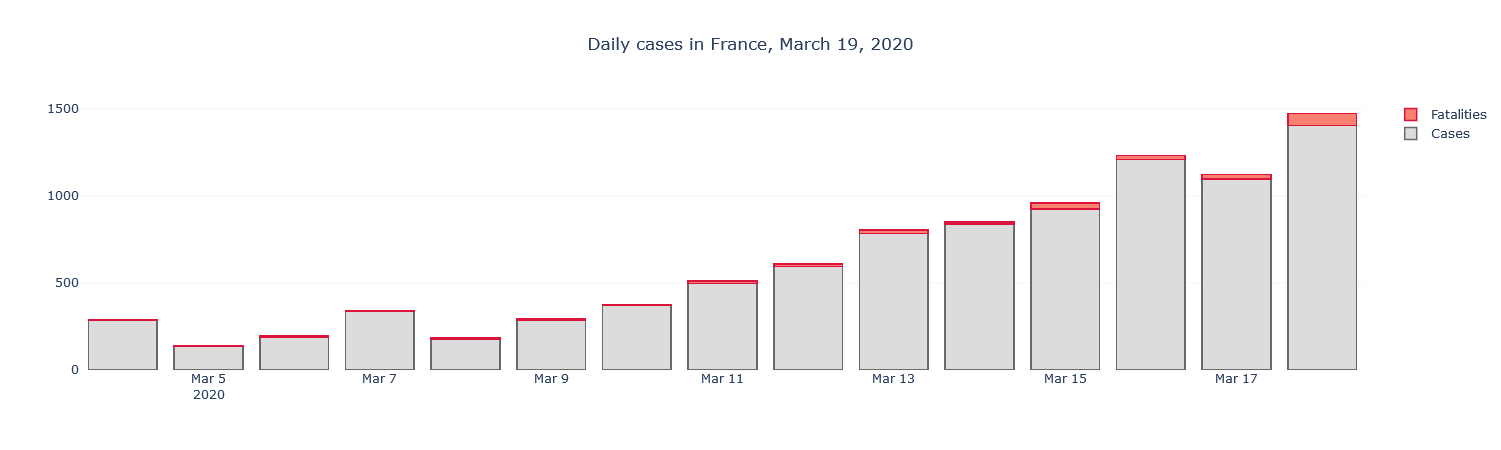

In [183]:
# Check daily cases
fig = go.Figure()

# daily cases
fig.add_trace(go.Bar(
    x = df_fr.date,
    y = cases_d,
    marker = dict(color = 'gainsboro', line = dict(color = 'dimgray', width=1.5)),
    name = 'Cases'
))

# daily deaths
fig.add_trace(go.Bar(
    x = df_fr.date,
    y = death_d,
    marker = dict(color = 'salmon', line = dict(color = 'crimson', width=1.5)),
    name = 'Fatalities'
))

fig.update_layout(
    plot_bgcolor='white', 
    barmode = 'stack',
    title = 'Daily cases in France, ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')


## Cases by Region

In [184]:
df_allReg = df_c_raw.loc[df_c_raw.granularite == 'region']
print('List for all regions')
all_reg_list = df_allReg.maille_nom.unique()
print(all_reg_list)

List for all regions
['Nouvelle-Aquitaine' 'Hauts-de-France' 'Grand-Est' 'Auvergne Rhône-Alpes'
 'Normandie' 'Bourgogne-Franche-Comté' 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion' 'Mayotte' 'Ile-de-France' 'Centre-Val de Loire' 'Grand Est'
 'Pays de la Loire' 'Bretagne' 'Occitanie' 'Auvergne-Rhône-Alpes'
 'Provence-Alpes-Côte d’Azur' 'Corse' 'Centre Val de Loire']


In [185]:
reg_std = 'Auvergne Rhône-Alpes'
df_reg = df_allReg.loc[df_allReg.maille_nom == reg_std]

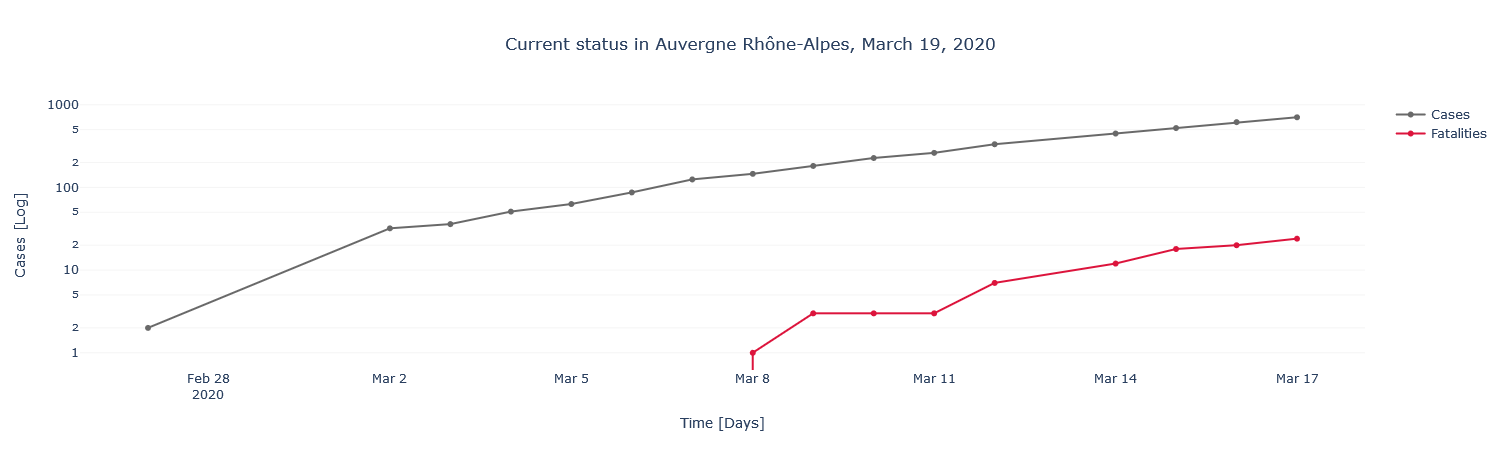

In [186]:
# Check global evolution
fig = go.Figure()
# Confirmed cases
fig.add_trace(
    go.Scatter(
        mode = 'lines+markers',
        x=df_reg.date, 
        y=np.array(df_reg.cas_confirmes, dtype=int),  
        name = 'Cases',
        marker=dict(color='DimGray'),
))
# Fatalities
fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        x=df_reg.date, 
        y=np.array(df_reg.deces, dtype=int), 
        name = 'Fatalities',
        marker=dict(color='crimson')
))

fig.update_layout(yaxis_title = 'Cases [Log]', yaxis_type="log")

fig.update_layout(
    xaxis_title = 'Time [Days]',
    plot_bgcolor='white',  
    title = 'Current status in ' + reg_std + ', ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

In [187]:
# Calculate daily arrays
data_tmp = np.array(df_reg.cas_confirmes, dtype=int)
cases_d = data_tmp[1:]-data_tmp[:data_tmp.size-1]
cases_d = np.insert(cases_d, 0, data_tmp[0])

# Daily death
data_tmp = np.array(df_reg.deces, dtype=int)
death_d = data_tmp[1:]-data_tmp[:data_tmp.size-1]
death_d = np.insert(death_d, 0, data_tmp[0])

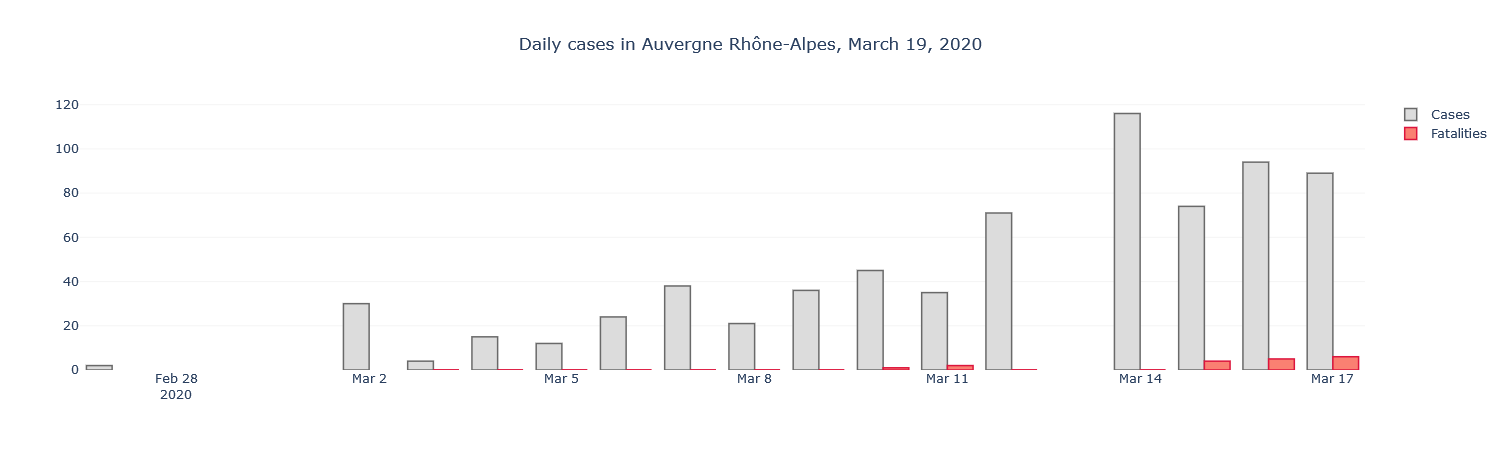

In [188]:
# Check daily cases
fig = go.Figure()

# daily cases
fig.add_trace(go.Bar(
    x = df_reg.date,
    y = cases_d,
    marker = dict(color = 'gainsboro', line = dict(color = 'dimgray', width=1.5)),
    name = 'Cases'
))

# daily deaths
fig.add_trace(go.Bar(
    x = df_dep.date,
    y = death_d,
    marker = dict(color = 'salmon', line = dict(color = 'crimson', width=1.5)),
    name = 'Fatalities'
))

fig.update_layout(
    plot_bgcolor='white', 
    #barmode = 'stack',
    title = 'Daily cases in ' + reg_std + ', ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')


## Cases by Department

In [189]:
df_allDep = df_c_raw.loc[df_c_raw.granularite == 'departement']
print('List for all departments')
all_dep_list = df_allDep.maille_nom.unique()
print(all_dep_list)

List for all departments
['Charente' 'Charente-Maritime' 'Corrèze' 'Creuse' 'Dordogne' 'Gironde'
 'Landes' 'Lot-et-Garonne' 'Pyrénées-Atlantiques' 'Deux-Sèvres' 'Vienne'
 'Haute-Vienne' 'Hérault' 'Haute-Savoie' 'Aisne' 'Doubs' 'Nord' 'Oise'
 'Pas-de-Calais' 'Somme' 'Territoire de Belfort' "Côte-d'Or" 'Finistère'
 'Loire-Atlantique' 'Bas-Rhin' 'Alpes-Maritimes' 'Maine-et-Loire'
 'Mayenne' 'Seine-Maritime' 'Ille-et-Vilaine' 'Morbihan' 'Sarthe'
 'Saint-Barthélemy' 'Saint-Martin' 'Ain' 'Ardennes' 'Aube' 'Eure' 'Marne'
 'Haute-Marne' 'Meurthe-et-Moselle' 'Meuse' 'Moselle' 'Haut-Rhin' 'Rhône'
 'Vosges' 'Gard' 'Saône-et-Loire' 'Savoie' 'Drôme' 'Aveyron'
 'Bouches-du-Rhône' "Côtes-d'Armor" 'Eure-et-Loir' 'Indre-et-Loire'
 'Haute-Saône' 'Vaucluse' 'Guyane' 'Hautes-Alpes' 'Calvados' 'Cher'
 'Corse du Sud' 'Corse-du-Sud' 'Haute-Corse' 'Haute-Garonne' 'Indre'
 'Loir-et-Cher' 'Loiret' 'Manche' 'Puy-de-Dôme' 'Paris' 'Seine-et-Marne'
 'Yvelines' 'Var' 'Essone' 'Hauts-de-Seine' 'Seine-Saint-Denis'
 'V

In [190]:
dep_std = 'Savoie'
df_dep = df_allDep.loc[df_allDep.maille_nom == dep_std]

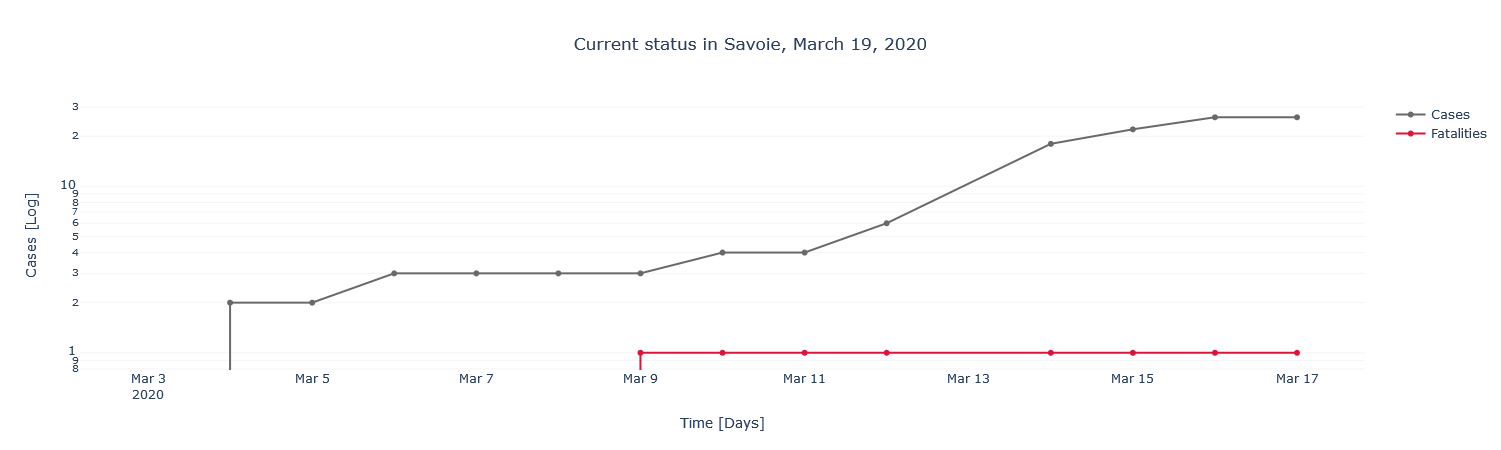

In [191]:
# Check global evolution
fig = go.Figure()
# Confirmed cases
fig.add_trace(
    go.Scatter(
        mode = 'lines+markers',
        x=df_dep.date, 
        y=np.array(df_dep.cas_confirmes, dtype=int),  
        name = 'Cases',
        marker=dict(color='DimGray'),
))
# Fatalities
fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        x=df_dep.date, 
        y=np.array(df_dep.deces, dtype=int), 
        name = 'Fatalities',
        marker=dict(color='crimson')
))

fig.update_layout(yaxis_title = 'Cases [Log]', yaxis_type="log")

fig.update_layout(
    xaxis_title = 'Time [Days]',
    plot_bgcolor='white',  
    title = 'Current status in ' + dep_std + ', ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

In [192]:
# Calculate daily arrays
data_tmp = np.array(df_dep.cas_confirmes, dtype=int)
cases_d = data_tmp[1:]-data_tmp[:data_tmp.size-1]
cases_d = np.insert(cases_d, 0, data_tmp[0])

# Daily death
data_tmp = np.array(df_dep.deces, dtype=int)
death_d = data_tmp[1:]-data_tmp[:data_tmp.size-1]
death_d = np.insert(death_d, 0, data_tmp[0])

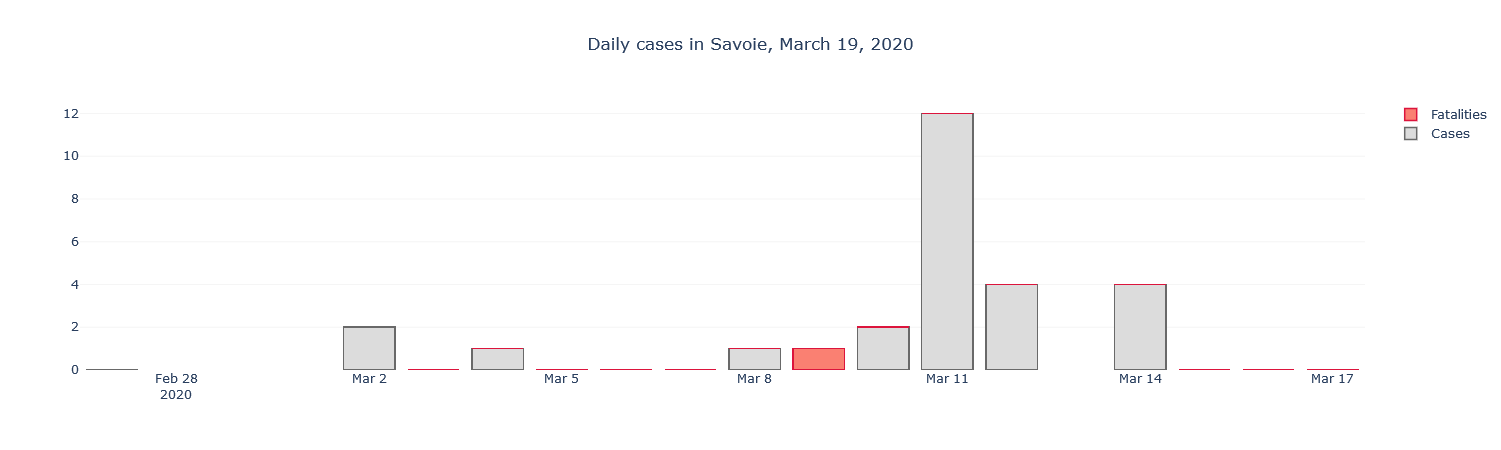

In [193]:
# Check daily cases
fig = go.Figure()
# daily cases
fig.add_trace(go.Bar(
    x = df_reg.date,
    y = cases_d,
    marker = dict(color = 'gainsboro', line = dict(color = 'dimgray', width=1.5)),
    name = 'Cases'
))

# daily deaths
fig.add_trace(go.Bar(
    x = df_dep.date,
    y = death_d,
    marker = dict(color = 'salmon', line = dict(color = 'crimson', width=1.5)),
    name = 'Fatalities'
))

fig.update_layout(
    barmode = 'stack',
    plot_bgcolor='white',
    title = 'Daily cases in ' + dep_std + ', ' + datetime.datetime.today().strftime('%B %d, %Y'),
    title_x = .5
)
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')